In [1]:
import dolfin as df
import pandas as pd
import os
import pickle
import seaborn as sns
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

In [3]:
init_vals_mc1 = {"alpha_i": "0.4",
                 "alpha_e": "0.2",
                 "Na_i": "15.510234830675616",
                 "K_i": "99.19015487718889",
                 "Cl_i": "5.064077397202017",
                 "Na_e": "146.5802367864952",
                 "K_e": "3.018983797774815",
                 "Cl_e": "133.87184520559637",
                 "phi_i": "-0.08466809466757282",
                 "phi_e": "0.0", 
                "j_pump":"0.49300808260605866"}
init_vals_mc2 = {"alpha_i": "0.4",
               "alpha_e": "0.2",
               "Na_i": "16.01687043298563",
               "K_i": "101.8119945467372",
               "Cl_i": "8.178137436692428",
               "Na_e": "140.49833715718293",
               "K_e": "2.843932883374001",
               "Cl_e": "127.64372512661636",
               "phi_i": "-0.08602575967833817",
               "phi_e": "0.0",
                 "j_pump": "0.4910206924444243"}
init_vals_mc3 = {"alpha_i": "0.4",
                 "alpha_e": "0.2",
                 "Na_i": "15.510281172306579",
                 "K_i": "99.18951634974886",
                 "Cl_i": "5.064058134333789",
                 "HCO3_i": "8.415887810925824",
                 "Na_e": "146.58022949539213",
                 "K_e": "3.02017546049593",
                 "Cl_e": "133.87188373133282",
                 "HCO3_e": "14.068224378148397",
                 "phi_i": "-0.08465790884483847",
                 "phi_e": "0.0", 
                 "j_pump": "0.4930734140830999"
                }
init_vals_mc4 = {"alpha_i": "0.4",
                 "alpha_e": "0.2",
                 "Na_i": "15.510234830675616",
                 "K_i": "99.19015487718889",
                 "Cl_i": "5.064077397202017",
                 "Na_e": "146.5802367864952",
                 "K_e": "3.018983797774815",
                 "Cl_e": "133.87184520559637",
                 "phi_i": "-0.08466809466757282",
                 "phi_e": "0.0", 
                "j_pump": "0.49300808260605866"}
init_vals_mc5 = {"alpha_i": "0.4",
                 "alpha_e": "0.2",
                 "Na_i": "14.872969584642725",
                 "K_i": "98.52063389964302",
                 "Cl_i": "3.691088150654625",
                 "HCO3_i": "8.525956640279082",
                 "Na_e": "149.17352263058513",
                 "K_e": "3.0392704008382467",
                 "Cl_e": "136.61782369869186",
                 "HCO3_e": "13.848086719442074",
                 "phi_i": "-0.08468533324616204",
                 "phi_e": "0.0", 
                "j_pump": "0.4833926223714513"}
init_vals_mc7 = {"alpha_i": "0.4",
                 "alpha_e": "0.2",
                 "Na_i": "15.510234830675616",
                 "K_i": "99.19015487718889",
                 "Cl_i": "5.064077397202017",
                 "Na_e": "146.5802367864952",
                 "K_e": "3.018983797774815",
                 "Cl_e": "133.87184520559637",
                 "phi_i": "-0.08466809466757282",
                 "phi_e": "0.0", 
                "j_pump": "0.49251243987141136"}

list_of_dicts = [init_vals_mc1, init_vals_mc2, init_vals_mc3, init_vals_mc4, init_vals_mc5, init_vals_mc7]
init_vals = {}
keys = ["alpha_i", "alpha_e", "Na_i", "K_i", "Cl_i", "HCO3_i", "Na_e", "K_e", "Cl_e", "HCO3_e", "phi_i", "phi_e", "j_pump"]
for dictionary in list_of_dicts:
    for key in keys:
        if key not in init_vals:
            init_vals[key] = []
        if key not in dictionary:
            init_vals[key].append('na')
        else:
            init_vals[key].append(float(dictionary[key]))
init_vals = pd.DataFrame(data=init_vals, index=['MC1', 'MC2', 'MC3', 'MC4', 'MC5', 'MC7'], columns=keys)


In [4]:
R = 8.315
T = 300
F = 96490
init_vals['E_Na'] = (R * T / F) * np.log(init_vals['Na_i'] / init_vals['Na_e'])
init_vals['E_K'] = (R * T / F) * np.log(init_vals['K_i'] / init_vals['K_e'])
init_vals['E_Cl'] = (R * T / -F) * np.log(init_vals['Cl_i'] / init_vals['Cl_e'])

In [7]:
display(HTML(init_vals[['']].to_html()))

,alpha_i,alpha_e,Na_i,K_i,Cl_i,HCO3_i,Na_e,K_e,Cl_e,HCO3_e,phi_i,phi_e,j_pump,E_Na,E_K,E_Cl
MC1,0.4,0.2,15.510235,99.190155,5.064077,na,146.580237,3.018984,133.871845,na,-0.084668,0.0,0.493008,-0.058066,0.090280,0.084659
MC2,0.4,0.2,16.016870,101.811995,8.178137,na,140.498337,2.843933,127.643725,na,-0.086026,0.0,0.491021,-0.056140,0.092498,0.071037
MC3,0.4,0.2,15.510281,99.189516,5.064058,8.415888,146.580229,3.020175,133.871884,14.068224,-0.084658,0.0,0.493073,-0.058066,0.090269,0.084659
MC4,0.4,0.2,15.510235,99.190155,5.064077,na,146.580237,3.018984,133.871845,na,-0.084668,0.0,0.493008,-0.058066,0.090280,0.084659
MC5,0.4,0.2,14.872970,98.520634,3.691088,8.525957,149.173523,3.039270,136.617824,13.848087,-0.084685,0.0,0.483393,-0.059604,0.089931,0.093360
MC7,0.4,0.2,15.510235,99.190155,5.064077,na,146.580237,3.018984,133.871845,na,-0.084668,0.0,0.492512,-0.058066,0.090280,0.084659


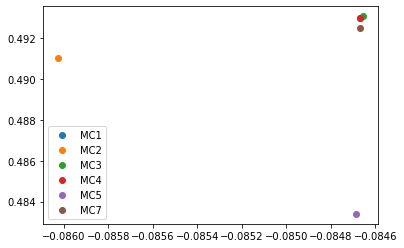

In [8]:
x = init_vals['phi_i']
y = init_vals['j_pump']

plts = []
for i, val in enumerate(x):
    a = plt.scatter(val, y[i])
plt.legend(['MC1', 'MC2', 'MC3', 'MC4', 'MC5', 'MC7'])

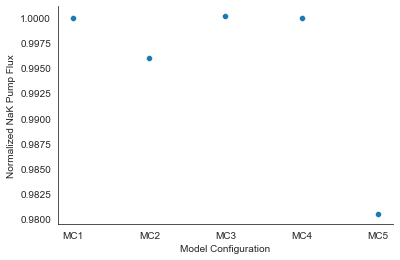

In [13]:
y = init_vals['j_pump'].iloc[0:5] / init_vals['j_pump']['MC1']
sns.set_style('white')
ax = sns.scatterplot(data=y)
ax.set(ylabel='Normalized NaK Pump Flux', xlabel='Model Configuration')
sns.despine()
ax.get_figure().savefig("./results/figures/pump_flux.png", dpi=600)

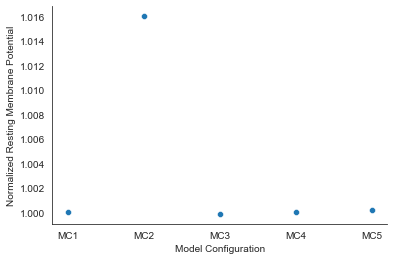

In [12]:
y = init_vals['phi_i'].iloc[0:5] / init_vals['phi_i']['MC1']
sns.set_style('white')
ax = sns.scatterplot(data=y)
ax.set(ylabel='Normalized Resting Membrane Potential', xlabel='Model Configuration')
sns.despine()
ax.get_figure().savefig("./results/figures/resting_membrane_voltage.png", dpi=600)

In [ ]:
# Getting back the objects:
with open('MC1_timedata.pkl') as f:  # Python 3: open(..., 'rb')
    obj0, obj1, obj2 = pickle.load(f)